# Importar librerías

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Leer imagen

In [3]:
img = cv2.imread('Imagenes\k0015.jpg')

In [4]:
img.shape

(720, 960, 3)

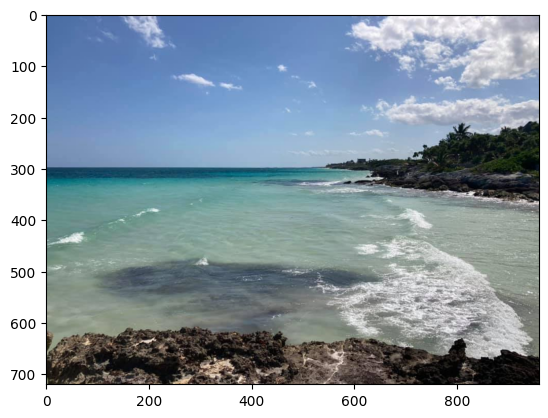

In [5]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Función que genere un histograma considerando todos los canales de la imagen

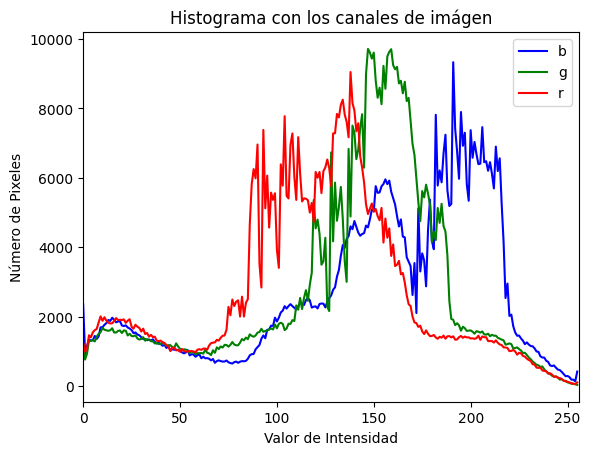

In [6]:
def hist_canals(img):
    color = ('b','g','r')
    for i,col in enumerate(color):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color = col, label=col)
        plt.legend()
        plt.xlim([0,256])
        
    plt.xlabel('Valor de Intensidad')
    plt.ylabel('Número de Pixeles')
    plt.title('Histograma con los canales de imágen')
    plt.show()

hist_canals(img)

# Función que genera una subventana de la imagen 

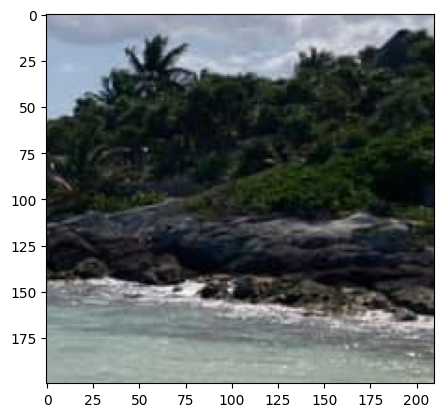

In [14]:
x1, y1 = 750, 200  # Coordenadas de la esquina superior izquierda
x2, y2 = 960, 400  # Coordenadas de la esquina inferior derecha

# Recorta la subventana
area = img[y1:y2, x1:x2]


# Convierte la subventana a escala de grises utilizando la fórmula NTSC
#subventana_escala_de_grises = cv2.cvtColor(area)
# Muestra la subventana
subventana = cv2.cvtColor(area, cv2.COLOR_BGR2RGB)
plt.imshow(subventana)

plt.show()


# Conversión de la subventana a escala de grises

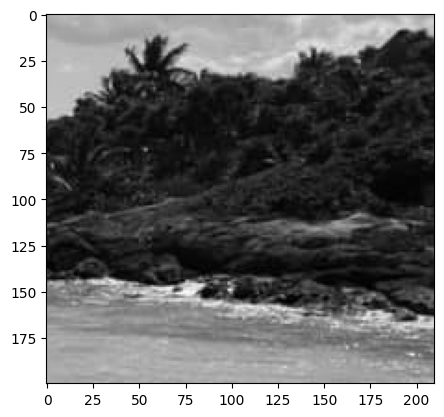

In [16]:
# Fórmula para convertir una imagen en color a escala de grises ponderando los canales RGB
imagen_gris = 0.299 * subventana[:,:,2] + 0.587 * subventana[:,:,1] + 0.114 * subventana[:,:,0]

# Se muestra la forma (dimensiones) de la imagen en escala de grises
imagen_gris.shape
plt.imshow(imagen_gris, cmap ='gray')

# Histograma de la subventana recortada en escala de grises 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

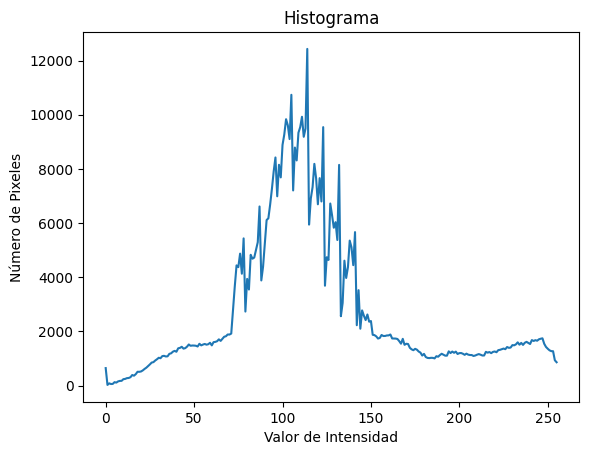

In [10]:
def hist_plot(img):
     
    height, width = img.shape
    # Lista para almacenar la frecuencia de valores de cada intensidad de color
    count =[]
     
    # Lista para todos los posibles valores de intensidad
    r = []
    
    # Itera a través de los valores de intensidad posibles (0-255)
    for k in range(0, 256):
        r.append(k)
        count1 = 0
         
        # Recorre cada píxel de la imagen para contar cuántos píxeles tienen la intensidad 'k'
        for i in range(height):
            for j in range(width):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1)
         
    return (r, count)

# Escalamos la imagen multiplicando por 255 y convirtiéndola a tipo uint8
img_stretch = (imagen_gris * 255).astype(np.uint8)
img_stretch.shape

r, count = hist_plot(img_stretch)
print(r)
print(count)

#plotting the histograma
plt.plot(r, count)
plt.xlabel('Valor de Intensidad')
plt.ylabel('Número de Pixeles')
plt.title('Histograma')
plt.show()